In [1]:
import pandas as pd

In [2]:
apexdf = pd.read_csv('/Users/p.tempfli/prog/event-monitor-logfetch/data/0AT1r000008VLV8GAO.data.txt')

In [3]:
NUM_COLS = ['RUN_TIME', 'CPU_TIME', 'DB_TOTAL_TIME', 'NUMBER_SOQL_QUERIES', 'CALLOUT_TIME']
apexdf[NUM_COLS].mean()

RUN_TIME               270.255757
CPU_TIME               133.682295
DB_TOTAL_TIME           49.852813
NUMBER_SOQL_QUERIES      2.413576
CALLOUT_TIME            10.567263
dtype: float64

In [8]:
apexdf.tail()

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,RUN_TIME,CPU_TIME,URI,SESSION_KEY,LOGIN_KEY,...,DB_TOTAL_TIME,CALLOUT_TIME,NUMBER_SOQL_QUERIES,ENTRY_POINT,QUIDDITY,IS_LONG_RUNNING_REQUEST,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,URI_ID_DERIVED
15772661,ApexExecution,2.020081e+13,TID:3370313820000e55d8,00Dw0000000l3C7,0051r00000AVhxJ,50,37,NaN,NaN,NaN,...,41,0,2,AutoCloseTab_AuraController.isCaseClosed,L,0,2020-08-07T23:59:59.969Z,0051r00000AVhxJAAT,NaN,NaN
15772662,ApexExecution,2.020081e+13,TID:3434676570000029b5,00Dw0000000l3C7,0051r000009SMyY,48,30,NaN,NaN,NaN,...,41,0,2,AutoCloseTab_AuraController.isCaseClosed,L,0,2020-08-07T23:59:59.969Z,0051r000009SMyYAAW,NaN,NaN
15772663,ApexExecution,2.020081e+13,TID:5417615930000129a5,00Dw0000000l3C7,0051r00000AQ62L,574,472,NaN,NaN,NaN,...,20,41,1,CaseControllerLightning.getAllPicklistValuesRe...,L,0,2020-08-07T23:59:59.981Z,0051r00000AQ62LAAT,NaN,NaN
15772664,ApexExecution,2.020081e+13,TID:998538790000ffb7d1,00Dw0000000l3C7,0051r00000AVqPL,876,645,NaN,NaN,NaN,...,176,0,7,Aura,L,0,2020-08-07T23:59:59.985Z,0051r00000AVqPLAA1,NaN,NaN
15772665,ApexExecution,2.020081e+13,TID:8364601900000aa2fe,00Dw0000000l3C7,0051r000009SYcZ,589,479,NaN,NaN,NaN,...,16,51,1,CaseControllerLightning.getAllPicklistValuesRe...,L,0,2020-08-07T23:59:59.989Z,0051r000009SYcZAAW,NaN,NaN


In [5]:
apexdf[NUM_COLS].median()

RUN_TIME               57.0
CPU_TIME               37.0
DB_TOTAL_TIME          38.0
NUMBER_SOQL_QUERIES     2.0
CALLOUT_TIME            0.0
dtype: float64

In [88]:
def flatten(agg):
    combi_cols = [col + ':' + fun for (col, fun) in  agg.columns]
    combi_cols
    agg.columns = combi_cols

# Entry point stats

## Most frequent processes

In [164]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({
        'RUN_TIME' : ['count', 'mean'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
agg.sort_values(by='RUN_TIME:count', ascending=False)[0:20]

,RUN_TIME:count,RUN_TIME:mean,DB_TOTAL_TIME:mean
ENTRY_POINT,,,
AutoCloseTab_AuraController.isCaseClosed,6105980,54.892902,46.033401
SetConsoleTabName_AuraController.getChatDetails,1349944,65.031760,54.724129
CaseControllerLightning.getAllPicklistValues,1207298,254.876345,23.469896
CaseControllerLightning.getAllPicklistValuesReason3,1207296,674.618774,18.153253
CaseControllerLightning.getCurrentCaseReason,1207292,37.616957,18.171302
DH_ElastixSoftphoneController.getRecordId,1009185,35.425973,27.784272
TRIGGERS,821753,2194.259062,129.823002
HistoricalCases_AuraController.getCases,318227,307.285299,62.704651
CaseControllerLightning.getCaseFromChat,314697,174.449753,28.928407


In [165]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({
        'RUN_TIME' : ['count', 'mean', 'sum'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
agg.sort_values(by='RUN_TIME:sum', ascending=False)[0:20]

,RUN_TIME:count,RUN_TIME:mean,RUN_TIME:sum,DB_TOTAL_TIME:mean
ENTRY_POINT,,,,
TRIGGERS,821753,2194.259062,1803138967,129.823002
CaseControllerLightning.getAllPicklistValuesReason3,1207296,674.618774,814464547,18.153253
AutoCloseTab_AuraController.isCaseClosed,6105980,54.892902,335174963,46.033401
CaseControllerLightning.getAllPicklistValues,1207298,254.876345,307711701,23.469896
Aura,282776,544.195409,153885401,165.745389
HistoricalCases_AuraController.getCases,318227,307.285299,97786479,62.704651
SetConsoleTabName_AuraController.getChatDetails,1349944,65.031760,87789234,54.724129
"EmailToCaseHandler.handleInboundEmail(Messaging.InboundEmail, Messaging.InboundEnvelope)",21010,2636.432366,55391444,141.293527
CaseControllerLightning.getCaseFromChat,314697,174.449753,54898814,28.928407


## Processes with too many Queries

In [95]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({'NUMBER_SOQL_QUERIES' : ['count', 'mean']})
flatten(agg)
agg
agg = agg[agg['NUMBER_SOQL_QUERIES:count'] > 100]
agg.sort_values(by='NUMBER_SOQL_QUERIES:mean', ascending=False)[0:15]


,NUMBER_SOQL_QUERIES:count,NUMBER_SOQL_QUERIES:mean
ENTRY_POINT,,
VFRemote- CtrOpportunityLineItems invoke(createQuote),2598,52.069669
"ClsLeadProcessor.processLeadConversion(String, String, Boolean)",237,49.000000
BookingService.processRequestWrapper(),709,38.802539
ClsRemoteController.acceptQuote(String),497,36.231388
VF- /apex/LeadConversion2,6805,26.939015
socialengagement.inbound.CustomApexCallerImpl,10124,23.908139
VFRemote- CtrOpportunityLineItems invoke(save),1236,22.410194
VFRemote- CtrCreateNewAddress invoke(saveAddress),102,20.941176
"EmailToCaseHandler.handleInboundEmail(Messaging.InboundEmail, Messaging.InboundEnvelope)",21010,20.690433


## Longest, relatively frequent processes

In [99]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({
        'RUN_TIME' : ['count', 'mean'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
agg = agg[agg['RUN_TIME:count'] > 500]
agg.sort_values(by='RUN_TIME:mean', ascending=False)[0:20]

,RUN_TIME:count,RUN_TIME:mean,DB_TOTAL_TIME:mean
ENTRY_POINT,,,
BatchCCCaseClosure,780,39386.102564,4358.693590
AgentActivitiesLoader.futureExecute,3123,7566.605187,1632.525456
InteractionsLoader.futureExecute(String),5614,3400.294264,1247.331493
VFRemote- CtrOpportunityLineItems invoke(createQuote),2598,3113.027714,1334.185912
VFRemote- dsfs.EnvelopeController invoke(sendEnvelope),528,3067.982955,101.429924
socialengagement.inbound.CustomApexCallerImpl,10124,2991.279830,1691.361616
VF- /apex/LeadConversion2,6805,2747.702719,943.219398
"EmailToCaseHandler.handleInboundEmail(Messaging.InboundEmail, Messaging.InboundEnvelope)",21010,2636.432366,141.293527
BookingService.processRequestWrapper(),709,2272.476728,1104.997179


## Longest DB time processes

In [105]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({
        'RUN_TIME' : ['count', 'mean'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
agg = agg[agg['RUN_TIME:count'] > 500]
agg.sort_values(by='DB_TOTAL_TIME:mean', ascending=False)[0:20]

,RUN_TIME:count,RUN_TIME:mean,DB_TOTAL_TIME:mean
ENTRY_POINT,,,
BatchCCCaseClosure,780,39386.102564,4358.693590
socialengagement.inbound.CustomApexCallerImpl,10124,2991.279830,1691.361616
AgentActivitiesLoader.futureExecute,3123,7566.605187,1632.525456
VFRemote- CtrOpportunityLineItems invoke(createQuote),2598,3113.027714,1334.185912
InteractionsLoader.futureExecute(String),5614,3400.294264,1247.331493
BookingService.processRequestWrapper(),709,2272.476728,1104.997179
VF- /apex/LeadConversion2,6805,2747.702719,943.219398
ClsRestShippingOrderUpdAftership.updateShippingStatus(),3256,1630.554668,856.070025
VFRemote- CtrTerminationRestaurantVue invoke(terminateContracts),614,1771.928339,640.026059


## Longest Callouts

In [110]:
agg = apexdf.groupby(['ENTRY_POINT']).agg({
        'CALLOUT_TIME' : ['count', 'mean'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
agg = agg[agg['CALLOUT_TIME:count'] > 10]
agg.sort_values(by='CALLOUT_TIME:mean', ascending=False)[0:20]

,CALLOUT_TIME:count,CALLOUT_TIME:mean,DB_TOTAL_TIME:mean
ENTRY_POINT,,,
BatchCreateTrackingIdOnAfterShip,348,5435.094828,597.830460
ClsOpportunityProcessor.approvePremiumPlacementInMidas(Id),95,2701.557895,98.400000
VFRemote- dsfs.EnvelopeController invoke(sendEnvelope),528,2624.731061,101.429924
ONBC1.BatchRemoteSObjectUpsert,39,1246.871795,1717.102564
ONBC1.RemoteSObjectUpserter,188,817.845745,192.771277
AgentActivitiesLoader.futureExecute,3123,478.679795,1632.525456
InteractionsLoader.futureExecute(String),5614,440.249555,1247.331493
AutoCloseTab_AuraController.sendSurveyCallout,26770,300.355697,0.000000
VF- /apex/dsfs__docusign_editenvelope,667,262.025487,106.274363


# User stats
## Top users

In [114]:
agg = apexdf.groupby(['USER_ID']).agg({
        'RUN_TIME' : ['count', 'mean'], 
        'DB_TOTAL_TIME' : ['mean'],
        }
    )
flatten(agg)
# agg = agg[agg['CALLOUT_TIME:count'] > 10]
agg.sort_values(by='RUN_TIME:count', ascending=False)[0:20]

,RUN_TIME:count,RUN_TIME:mean,DB_TOTAL_TIME:mean
USER_ID,,,
0051r000009l2Ai,912896,35.399571,27.765310
0051r00000AVoxG,59202,56.801780,43.893196
0051r00000APmn2,59200,62.174611,29.337872
0051r000008rmvF,48995,551.452230,316.229227
0051r000009TQ1K,38824,84.843422,37.358927
0051r00000AVqEh,36397,112.512542,42.485974
0051r00000AVrPM,28632,100.808501,41.406503
0051r00000APmo5,27651,114.472605,32.921775
0051r000009SAgS,27105,143.986829,50.889135


In [140]:
sm = apexdf.sample(500000)

In [141]:
import dateutil.parser

sm['HOUR'] = sm['TIMESTAMP_DERIVED'].apply(lambda d : dateutil.parser.isoparse(d).hour)
# dateutil.parser.isoparse('2020-08-07T09:53:52.328Z')

In [142]:
sm['HOUR']

10948959    16
5527677      9
1903864      3
7433674     12
3188301      5
            ..
2134456      3
9851601     15
1531144      2
6367006     11
5432288      9
Name: HOUR, Length: 500000, dtype: int64

In [143]:
agg = sm.groupby(['HOUR']).agg({
    'DB_TOTAL_TIME' : ['sum']
})

<AxesSubplot:xlabel='HOUR'>

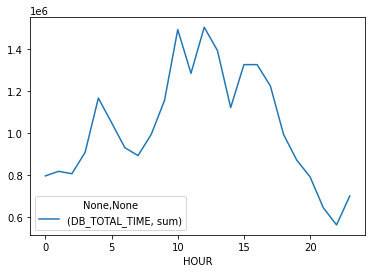

In [144]:
agg.plot()

1930


<AxesSubplot:xlabel='HOUR'>

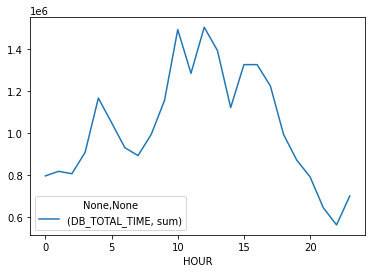

In [159]:
sm2 = sm[sm['RUN_TIME'] > 10000]
print(len(sm2))
agg = sm.groupby(['HOUR']).agg({
    'DB_TOTAL_TIME' : ['sum']
})
agg.plot()

321898


<AxesSubplot:xlabel='HOUR'>

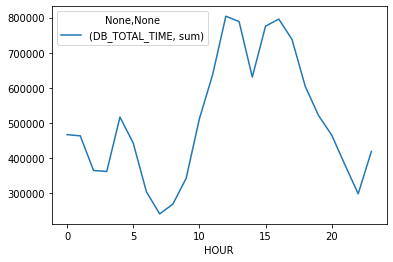

In [160]:
sm3 = sm[sm['RUN_TIME'] < 100]
print(len(sm3))
agg = sm3.groupby(['HOUR']).agg({
    'DB_TOTAL_TIME' : ['sum']
})
agg.plot()